## <font color='bule'>12/50 发散型包点图 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

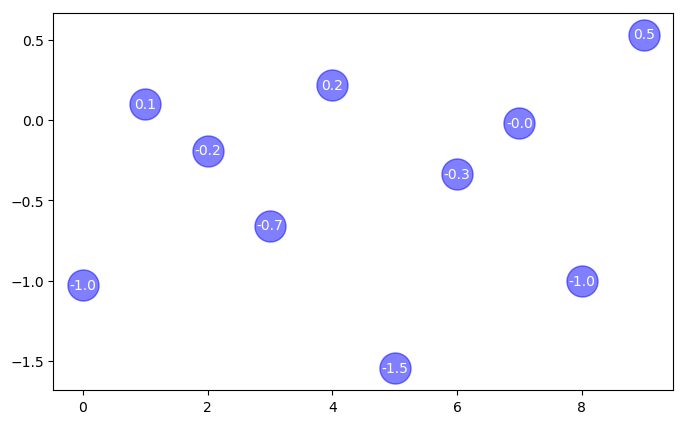

In [5]:
# 绘画简单的demo
data = np.random.randn(10)
plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(range(10), data, s=500, c='b', alpha=0.5)
for x, y in zip(range(10), data):
    plt.text(x, y, round(y, 1), 
             fontdict={'size': 10, 'color': 'w'}, 
             horizontalalignment='center', 
             verticalalignment='center')
plt.show()

In [6]:
# 使用数据绘制
#导入数据集
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [7]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [8]:
name = ['英里每加仑','气缸数量','排量','总马力','驱动轴比'
        ,'重量','1/4英里所用时间','引擎形状','变速器','前进档数'
        ,'化油器数量','用油是否高效','汽车','汽车名称']
[*zip(df.columns, name)]

[('mpg', '英里每加仑'),
 ('cyl', '气缸数量'),
 ('disp', '排量'),
 ('hp', '总马力'),
 ('drat', '驱动轴比'),
 ('wt', '重量'),
 ('qsec', '1/4英里所用时间'),
 ('vs', '引擎形状'),
 ('am', '变速器'),
 ('gear', '前进档数'),
 ('carb', '化油器数量'),
 ('fast', '用油是否高效'),
 ('cars', '汽车'),
 ('carname', '汽车名称')]

In [12]:
# 将mpg标准化
# type(df.loc[:, 'mpg']) # pandas.core.series.Series
# type(df.loc[:, ['mpg']]) # pandas.core.frame.DataFrame
type(df.mpg) # pandas.core.series.Series

pandas.core.series.Series

In [16]:
df['mpg_z'] = (df.mpg - df.mpg.mean()) / df.mpg.std()
df['colors'] = ['green' if i > 0 else 'red' for i in df.mpg_z]
df.sort_values(by=['mpg_z'], inplace=True)
df.index = range(df.shape[0])
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


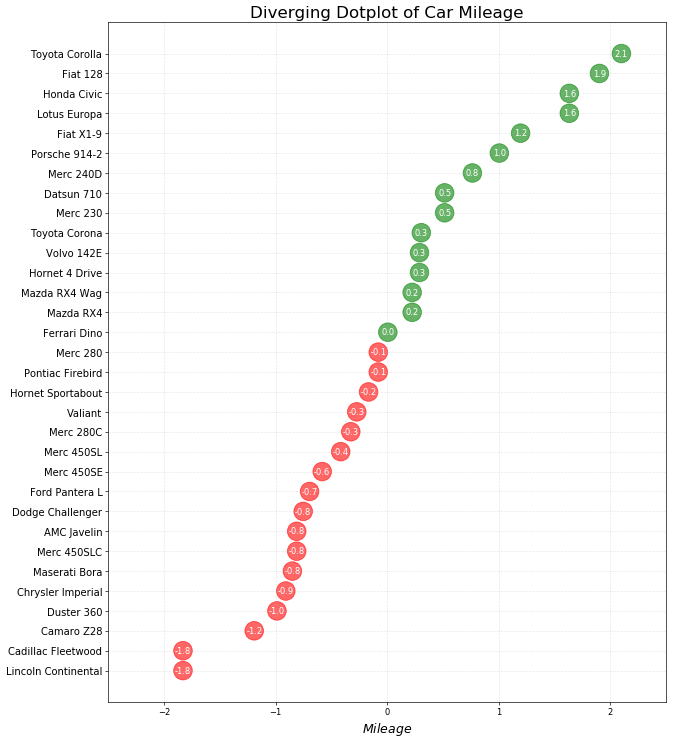

In [34]:
# 绘制发散型包点图
plt.figure(figsize=(12, 15), dpi=60)
plt.scatter(df.mpg_z, df.index, s=500, alpha=0.6, color=df.colors)
for x, y, text in zip(df.mpg_z, df.index, df.mpg_z):
    plt.text(x, y, round(text, 1), 
             fontdict={'size': 10, 'color': 'w'},
             horizontalalignment='center',
             verticalalignment='center',
            )
plt.title('Diverging Dotplot of Car Mileage',fontsize=20)
plt.xlabel('$Mileage$',fontsize=15)
plt.yticks(df.index, df.carname, fontsize=12)
plt.xlim(-2.5, 2.5)
plt.grid(linestyle='--', alpha=0.3)
plt.show()

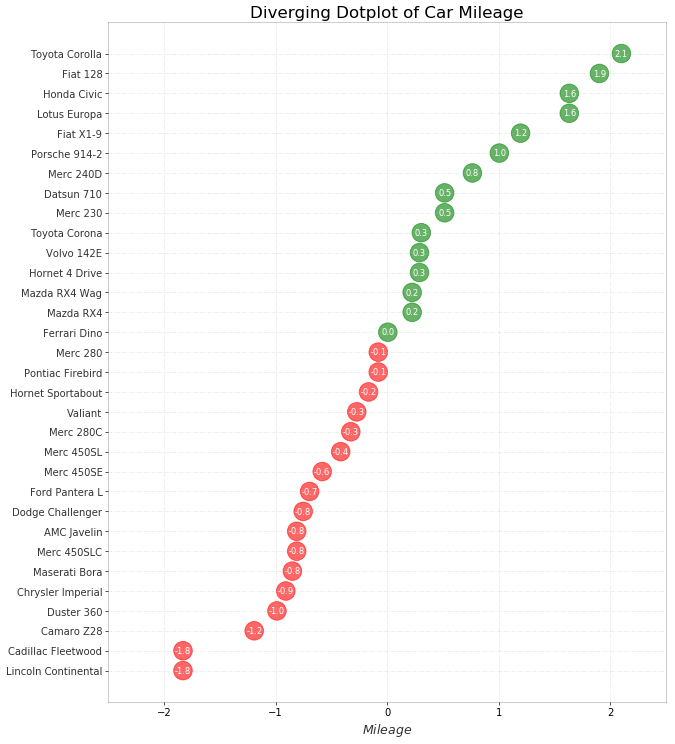

In [39]:
# 设置边框的alpha
#创建画布并设定画布大小
plt.figure(figsize=(12,15),dpi=60
           #,facecolor='lightblue'
          )

#绘制散点图
plt.scatter(df.mpg_z,df.index,s=500,alpha=0.6,color=df.colors)
#添加文本
for x,y,text in zip(df.mpg_z,df.index,df.mpg_z):
    plt.text(x,y,round(text,1),fontdict={'color':'w','size':10}
             ,horizontalalignment='center'
             ,verticalalignment='center')

# 设置边框的透明度
plt.gca().spines['right'].set_alpha(.3)
plt.gca().spines['left'].set_alpha(.3)
plt.gca().spines['top'].set_alpha(.3)
plt.gca().spines['bottom'].set_alpha(.3) 

#添加装饰
plt.title('Diverging Dotplot of Car Mileage',fontsize=20)
plt.xlabel('$Mileage$',fontsize=15,alpha=.8)
plt.xticks(fontsize=12)
plt.yticks(df.index,df.carname,fontsize=12,alpha=.8)
plt.xlim(-2.5,2.5)
plt.grid(linestyle='-.',alpha=.3);

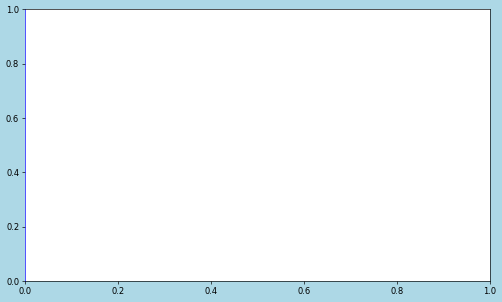

In [48]:
# 把画布和Axes对象分开来操作，可以使用fig，axes = 
fig, ax = plt.subplots(figsize=(10, 6), 
                       dpi=60, 
                       facecolor='lightblue')
ax.spines['left'].set_color('blue')

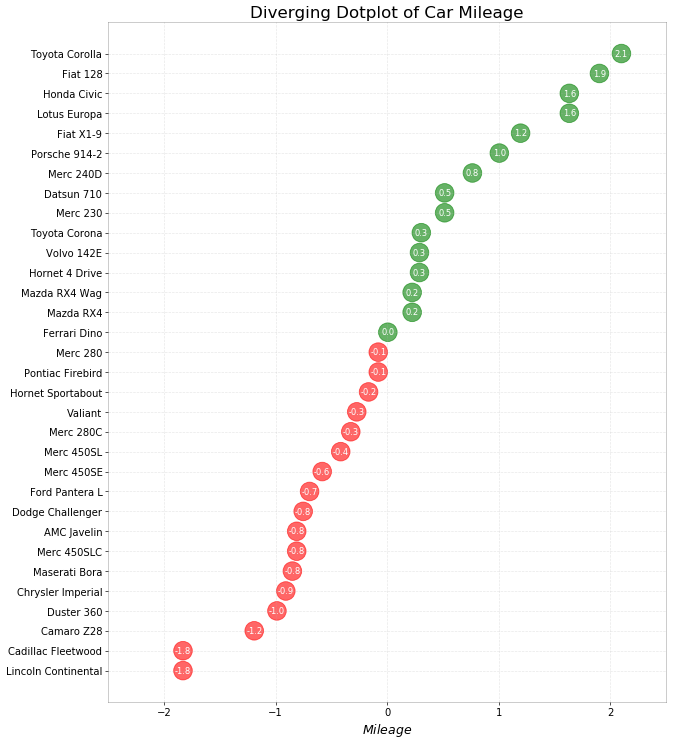

In [67]:
# 最终代码
fig, ax = plt.subplots(figsize=(12, 15), 
                       dpi=60, 
#                        facecolor='lightblue',
                       facecolor='white',
                      )
plt.scatter(df.mpg_z, df.index, s=500, alpha=0.6, color=df.colors)
for x, y, text in zip(df.mpg_z, df.index, df.mpg_z):
    plt.text(x, y, round(text, 1), 
             fontdict={'color': 'w', 'size': 10},
             horizontalalignment='center',
             verticalalignment='center'
            )

#添加装饰
ax.spines['left'].set_alpha(.3)
ax.spines['right'].set_alpha(.3)
ax.spines['top'].set_alpha(.3)
ax.spines['bottom'].set_alpha(.3)


plt.title('Diverging Dotplot of Car Mileage',fontsize=20)
plt.xlabel('$Mileage$',fontsize=15)
plt.yticks(df.index, df.carname, fontsize=12)
plt.grid(linestyle='--', alpha=0.3)
plt.xlim(-2.5, 2.5)
plt.xticks(fontsize=12)
plt.show()

## <font color='bule'>13/50 带标记的发散型棒棒糖图

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlib.patches as patches #导入补丁库

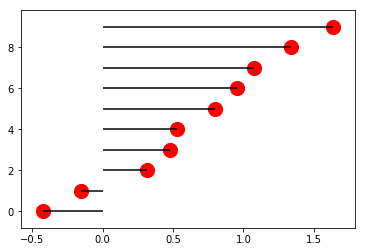

array([-0.42803498, -0.1549392 ,  0.31404518,  0.48143276,  0.52859839,
        0.79614877,  0.95532486,  1.07302497,  1.33854095,  1.64039437])

In [3]:
# 简单数据展示
X = np.random.randn(10)
X.sort()
plt.hlines(y=range(10), xmin=0, xmax=X)
plt.scatter(X, range(10), s=200, c='red')
plt.show()
X

In [6]:
# 开始上数据
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [7]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [8]:
# 和之前一样 数据标准化
df['mpg_z'] = (df.mpg - df.mpg.mean()) / df.mpg.std()
# 颜色我们暂且设置为黑色
df['colors'] = 'k' # black
df.sort_values(by=['mpg_z'], inplace=True)
df.index = range(df.shape[0])
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,k
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,k
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,k
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,k
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,k


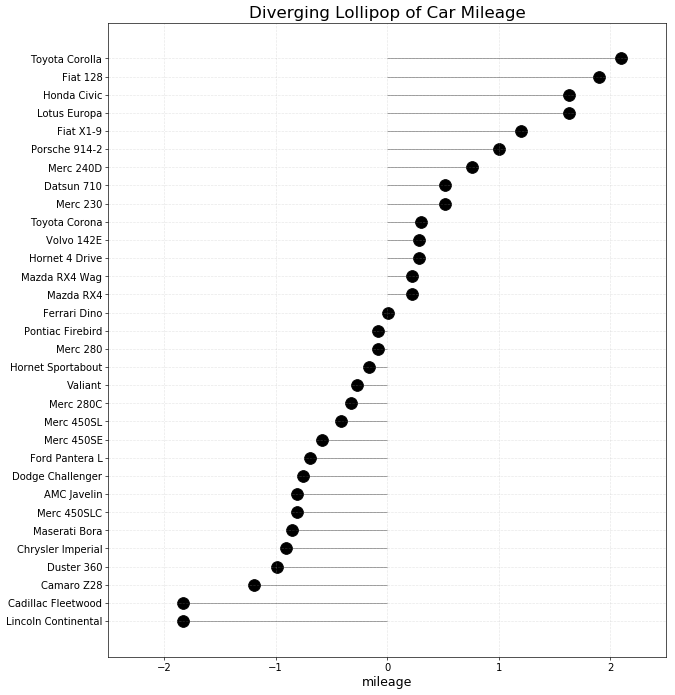

In [9]:
# 绘制发散性棒棒糖图
plt.figure(figsize=(12, 14), dpi=60)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, s=200, color='k')

plt.title('Diverging Lollipop of Car Mileage', fontsize=20)
plt.yticks(df.index, df.carname, fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(-2.5, 2.5)
plt.xlabel('mileage', fontsize=15)
plt.grid(linestyle='--', alpha=0.3)
plt.show()

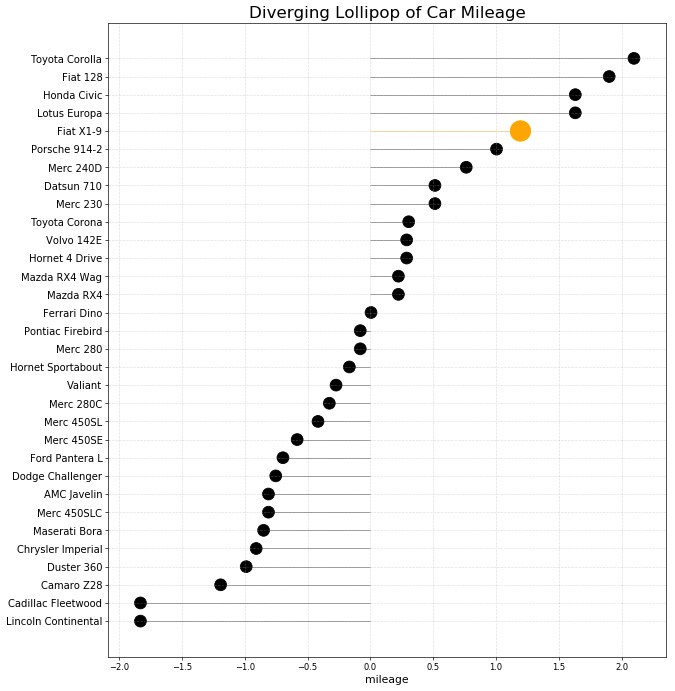

In [10]:
# 重点突出其中的某一个
df.loc[df.carname == 'Fiat X1-9', 'colors'] = 'orange'

plt.figure(figsize=(12, 14), dpi=60)
# 开始绘制棒棒糖
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, linewidth=1, color=df.colors, alpha=0.4)
plt.scatter(df.mpg_z, df.index, 
            s= [600 if i == 'Fiat X1-9' else 200 for i in df.carname], 
            color=df.colors,
           )

plt.title('Diverging Lollipop of Car Mileage', fontsize=20)
plt.xlabel('mileage', fontsize=13)
plt.yticks(df.index, df.carname, fontsize=12)
plt.grid(linestyle='--', alpha=0.4)
plt.show()

In [11]:
df.loc[df.carname == 'Fiat X1-9']

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
27,5.22494,4,79.0,66,4.08,1.935,18.9,1,1,4,1,1,Fiat X1-9,Fiat X1-9,1.195169,orange


#### **patches.Rectangle**
> 重要参数   
>> xy：补丁左下角的位置坐标   
>> width：补丁的宽度   
>> height：补丁的高度   
>> angle：旋转的角度(逆时针旋转)   
>> fill：是否填充

>> facecolor：补丁内部的颜色   
>> edgecolor：补丁边框的颜色

In [12]:
#导入补丁库
import matplotlib.patches as patches

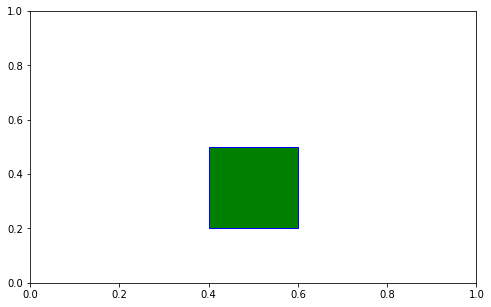

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
p = patches.Rectangle((.4, .2), 
                      width=.2, 
                      height=.3, 
                      facecolor='g', 
                      edgecolor='b',
                     )
ax.add_patch(p)

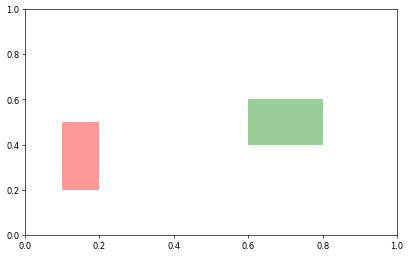

In [14]:
plt.figure(figsize=(8, 5), dpi=60)
p1 = patches.Rectangle((0.1, 0.2), width=0.1, height=0.3, facecolor='r', alpha=0.4)
p2 = patches.Rectangle((.6,.4),width=.2,height=.2,facecolor='g',alpha=.4)


#将补丁添加到子图上
plt.gca().add_patch(p1)
plt.gca().add_patch(p2);

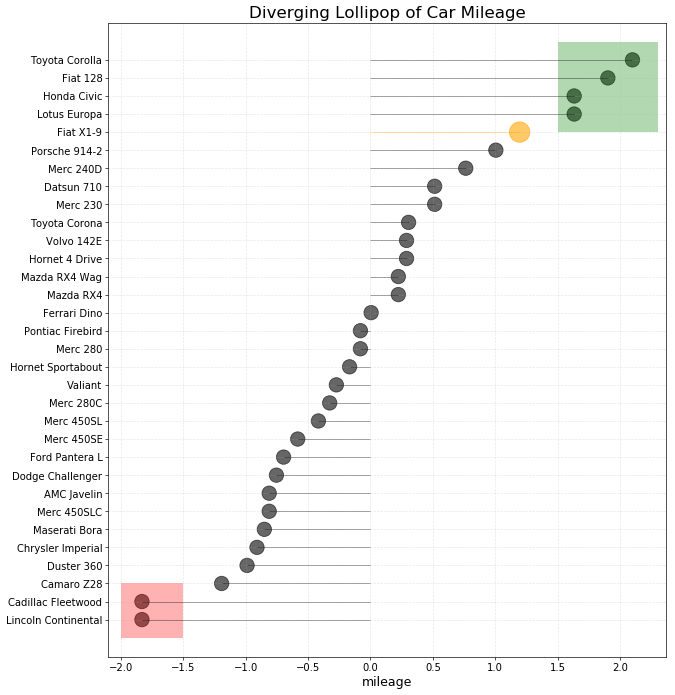

In [28]:
# 创建画布并设定画布大小
plt.figure(figsize=(12, 14), dpi=60)

# 绘制棒棒糖
plt.hlines(df.index, xmin=0, xmax=df.mpg_z, 
           color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, 
            alpha=0.6, 
            s=[600 if i=='Fiat X1-9' else 300 for i in df.cars],
           )

# 创建补丁
p1 = patches.Rectangle((1.5, 27), width=0.8, height=5, facecolor='g', alpha=0.3)
p2 = patches.Rectangle((-2.0, -1), width=0.5, height=3, facecolor='r', alpha=0.3)

# 将补丁添加到视图上
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# 添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict={'size':20})
plt.xlabel('mileage', fontsize=15)
plt.yticks(df.index, df.carname, fontsize=12)
plt.xticks(fontsize=12)
plt.grid(linestyle='--', alpha=0.3)
plt.show()

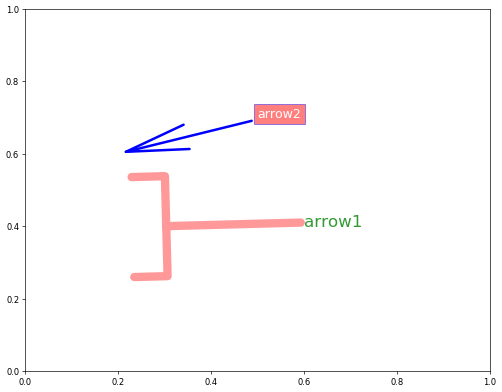

In [80]:
# plt.annotate 标注
plt.figure(figsize=(10, 8), dpi=60)
# plt.scatter(0.3, 0.4, s=20)
plt.annotate('arrow1', 
             xy=(0.3, 0.4), 
             xytext=(0.6, 0.4), 
             fontsize=20, 
             xycoords='data',  # data figure points
             color='g',
             alpha=0.8,
             arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=2', color='r', alpha=0.4, lw=10), # lw 控制线宽
            )
plt.annotate('arrow2', 
             xy=(0.2, 0.6), 
             xytext=(0.5, 0.7), 
             color='w', 
             fontsize=15, 
             bbox=dict(boxstyle='square', facecolor='r', edgecolor='b', alpha=0.5),
             arrowprops=dict(arrowstyle='->, head_length=5, head_width=1', lw=3, color='b'), # head_length 箭头长度 head_width 箭头宽度
            )
plt.show()

#### 常用的boxstyle有circle/darrow/larrow/rarrow/round/round4/roundtooth/sawtooth/square  


<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/boxstyle.png' width=500>

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/boxstyle.png' width=500>

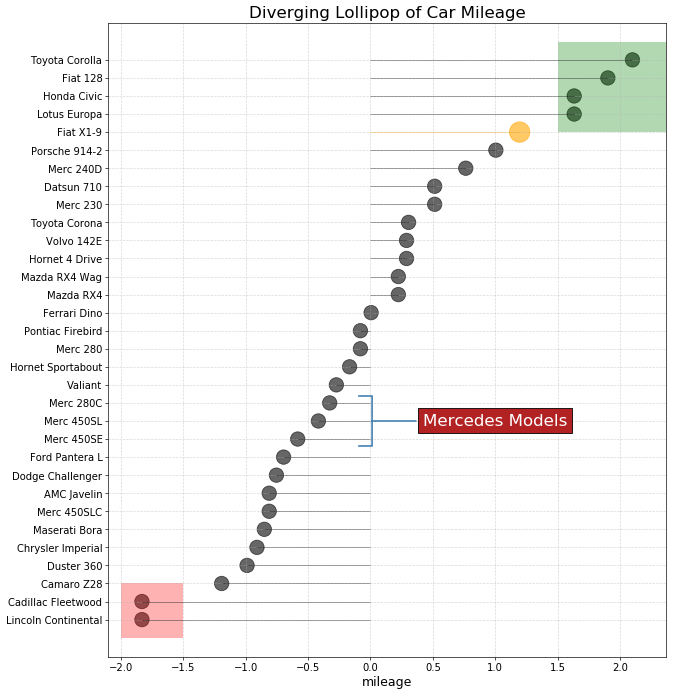

In [97]:
# 创建画布并设定画布大小
plt.figure(figsize=(12, 14), dpi=60)

# 绘制棒棒糖
plt.hlines(df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, 
            color=df.colors, 
            alpha=0.6, 
            s=[600 if i=='Fiat X1-9' else 300 for i in df.cars],
           )

# 添加补丁
p1 = patches.Rectangle((1.5, 27), width=8, height=5, facecolor='g', alpha=0.3)
p2 = patches.Rectangle((-2.0, -1), width=0.5, height=3, facecolor='r', alpha=0.3)

plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# 添加注释
plt.annotate('Mercedes Models', 
             xy=(0, 11), 
             xytext=(1, 11), 
             xycoords='data', 
             color='w',
             fontsize=20,
             ha='center',
             va='center',
             bbox=dict(boxstyle='square', facecolor='firebrick'),
             arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.8', lw=2, color='steelblue')
            )
# 添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict={'size':20})
plt.xlabel('mileage', fontsize=15)
plt.yticks(df.index, df.carname, fontsize=12)
plt.xticks(fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.show()